In [52]:
import tensorflow as tf
import numpy as np
import random

import matplotlib.pyplot as plt

In [156]:
# points = np.array([(1,1), (2,1.5), (3,2), (3.5, 6), (4,2.5), (5, 3), (6,8)])
points = np.array([(i + (random.random() - 0.5) * 50, i + (random.random() - 0.5) * 50) for i in range(100)])

xs = points[:, 0]
xs = np.reshape(xs, (len(xs), 1))
ys = points[:, 1]

In [157]:
x = tf.placeholder(tf.float32, (None, 1))
y = tf.placeholder(tf.float32, (None))
w = tf.Variable(tf.truncated_normal([1, 1]))
b = tf.Variable(tf.truncated_normal([1]))

init = tf.global_variables_initializer()

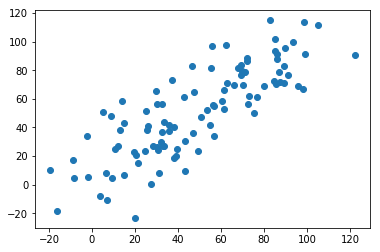

In [158]:
plt.scatter(xs, ys)
plt.show()

In [159]:
learning_rate = 0.00001
num_epochs = 100

h = tf.matmul(x, w)
loss = tf.reduce_mean(tf.square(h - y))

training_operation = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [160]:
sess = tf.Session()
sess.run(init)

for epoch in range(num_epochs):
  _, current_loss, ws, bs = sess.run([training_operation, loss, w, b], feed_dict={ x:xs, y:ys })
  print(f"{epoch}: {current_loss}")

0: 2263.715087890625
1: 2198.773193359375
2: 2142.13525390625
3: 2092.736328125
4: 2049.6533203125
5: 2012.076416015625
6: 1979.3038330078125
7: 1950.719970703125
8: 1925.791748046875
9: 1904.049560546875
10: 1885.0867919921875
11: 1868.5479736328125
12: 1854.1241455078125
13: 1841.5423583984375
14: 1830.5701904296875
15: 1821.00244140625
16: 1812.656005859375
17: 1805.3768310546875
18: 1799.0272216796875
19: 1793.4908447265625
20: 1788.6619873046875
21: 1784.449951171875
22: 1780.7760009765625
23: 1777.5716552734375
24: 1774.77880859375
25: 1772.3408203125
26: 1770.2149658203125
27: 1768.362060546875
28: 1766.7440185546875
29: 1765.3343505859375
30: 1764.1043701171875
31: 1763.0322265625
32: 1762.0980224609375
33: 1761.280029296875
34: 1760.56884765625
35: 1759.94921875
36: 1759.4068603515625
37: 1758.9344482421875
38: 1758.5216064453125
39: 1758.1641845703125
40: 1757.8511962890625
41: 1757.578369140625
42: 1757.3387451171875
43: 1757.1328125
44: 1756.950439453125
45: 1756.7916259765

[[ 0.74630481]] [-0.13739151]


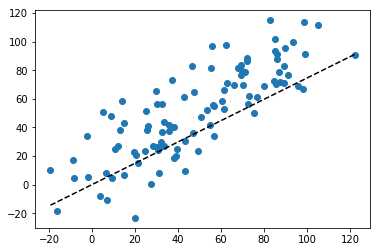

In [161]:
test_xs = [[xs.min()], [xs.max()]]
predicted_ys = sess.run(h, feed_dict={ x: test_xs })

plt.scatter(xs, ys)
print(ws, bs)

plt.plot(test_xs, predicted_ys, 'k--')
plt.show()

# sess.close()